
Fake News Detection is a prediction technique which starts first by preprocessing the input text, getting numerical features, and then training a machine learning model like Logistic Regression, SVM, Naive Bayes and Neural Networks to predict whether the news is reliable or not.

***Hypothesis*** - Using a supervised data of news , we would be able to train the model and predict whether the news is Legit or Fake

***Details about the Dataset:***

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is legit or fake:
           1: Fake news
           0: legit or real news







**Here We Begin !!!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Our models would be trained on vectors. To have vectors based on meaningful words, we would be removing the english stopwords

In [ ]:
import nltk
nltk.download('stopwords')
# printing the stopwords in English
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Pre-processing the data !

In [ ]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('NewsData.csv')
#news_dataset.shape

# counting the number of missing values in the dataset
news_dataset.isnull().sum()

# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

# print the first 5 rows of the dataframe
news_dataset.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Visualizing the correlation between features - if any !

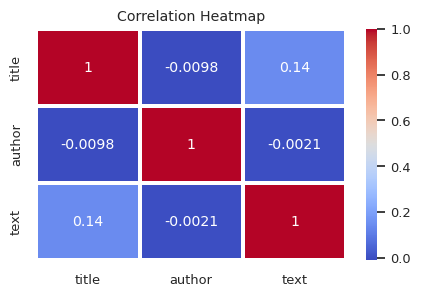

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

news_dataset_for_corr = news_dataset.copy()
news_dataset_NN = news_dataset.copy()

label_encoder = LabelEncoder()
news_dataset_for_corr['author'] = label_encoder.fit_transform(news_dataset_for_corr['author'])
news_dataset_for_corr['title'] = label_encoder.fit_transform(news_dataset_for_corr['title'])
news_dataset_for_corr['text'] = label_encoder.fit_transform(news_dataset_for_corr['text'])
# news_dataset_for_corr.head()
col_To_Exclude = ['id' , 'label']
news_dataset_for_corr = news_dataset_for_corr.drop(col_To_Exclude , axis =1)
correlation_matrix = news_dataset_for_corr.corr()
#correlation_matrix

plt.figure(figsize=(5, 3))
sns.set(font_scale=0.85)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


Stemming:

It is the process of reducing a word to its Root word.

example:
swimmer,swimming -> swim

In [ ]:
news_port_stem = PorterStemmer()

In [ ]:
def news_words_stemming(content):
    news_stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    news_stemmed_content = news_stemmed_content.lower()
    news_stemmed_content = news_stemmed_content.split()
    news_stemmed_content = [news_port_stem.stem(word) for word in news_stemmed_content if not word in stopwords.words('english')]
    news_stemmed_content = ' '.join(news_stemmed_content)
    return news_stemmed_content

Applying the stemming function to 'content' column.

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(news_words_stemming)
news_dataset_NN['content'] = news_dataset['content']  #copying the content in dataset to be used for Neural Networks

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

print(X[:5])
print(Y[:5])

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire'
 'jessica purkiss civilian kill singl us airstrik identifi'
 'howard portnoy iranian woman jail fiction unpublish stori woman stone death adulteri']
[1 0 1 1 1]


##Vectorization
The return type of vectorizer.transform is Compressed Sparse Row (CSR) format

In [ ]:
# converting the textual data to numerical data
newsdataset_words_vectorizer = TfidfVectorizer()
newsdataset_words_vectorizer.fit(X)

X = newsdataset_words_vectorizer.transform(X)
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Lets try to understand 1 document , which is represented as a sparse matrix

Eg: darrel lucu hous dem aid even see comey letter jason chaffetz tweet

***Explanation***: The word darrel is present in the 15686th column in 0th row, and its importance is 0.2848. According to this, it means the second last word "chaffetz" is most important in THIS sentence.

In [ ]:
example_of_vector = X[0:1]
print(example_of_vector)


  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766


Now that our documents / text is converted into a multidimensional space, lets train different models.

Starting with , splitting the dataset to training & test data




In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

First Model : Logistic Regression

Metrics :

1. Accuracy
2. Cross Validation
3. Cross Validation Performance with K folds
4. ROC curve
5. Confusion Metrics





Accuracy score of the training data :  0.9866
Accuracy score of the test data :  0.9791
Cross-Validation Scores: [0.97572115 0.97427885 0.97908654 0.97524038 0.97668269]


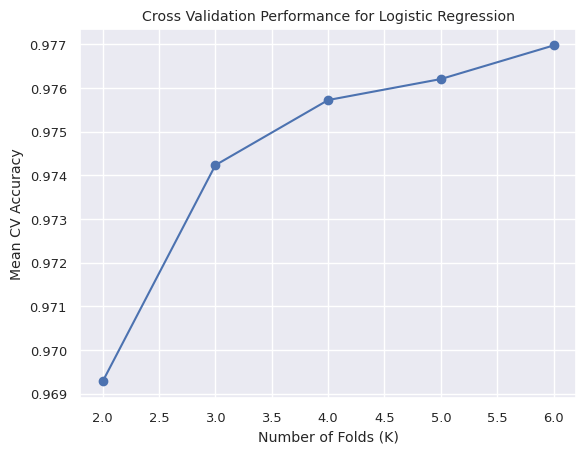

In [ ]:
# Logistic regression is a statistical model used for binary classification.
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = logistic_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy score on the test data
from sklearn.model_selection import cross_val_score

X_test_prediction = logistic_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

scores = cross_val_score(logistic_model, X, Y, cv=5, scoring='accuracy')


#Printing the metrics
print('Accuracy score of the training data : ' ,round(training_data_accuracy,4))
print('Accuracy score of the test data : ', round(test_data_accuracy,4) )
print("Cross-Validation Scores:", scores)

#plotting the cross validation
k_values = range(2,7)
cv_scores = []

for k in k_values:
    scores = cross_val_score(logistic_model, X, Y, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the cross-validation results
plt.figure()
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross Validation Performance for Logistic Regression')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

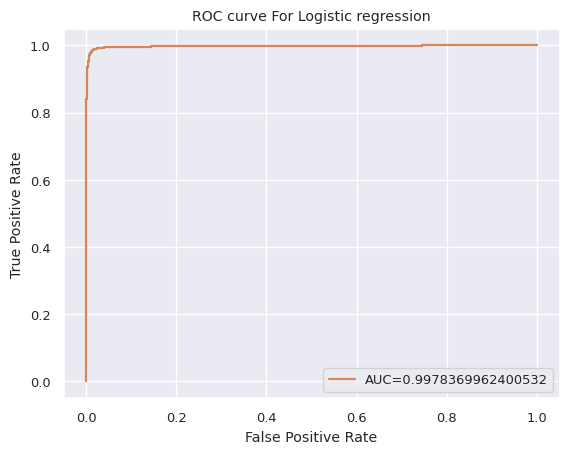

In [ ]:
#define metrics
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC curve For Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

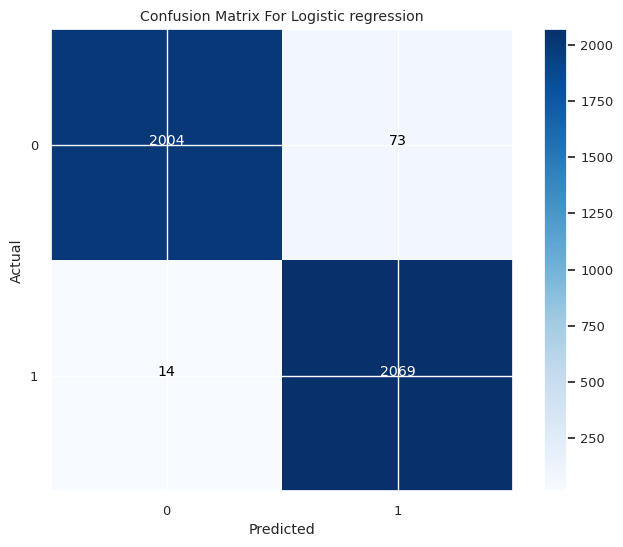

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Logistic regression')
plt.colorbar()
tick_marks = range(len(set(Y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='White' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()


-------------------------------------------------------------------------------

Second Model : Support Vector Model

Metrics :

1. Accuracy
2. Cross Validation
3. Cross Validation Performance with K folds
4. ROC curve  --- Not added
5. Confusion Metrics

Accuracy score of the training data :  0.9913
Cross-Validation Scores: [0.99350962 0.98990385 0.99399038 0.99350962 0.98990385]


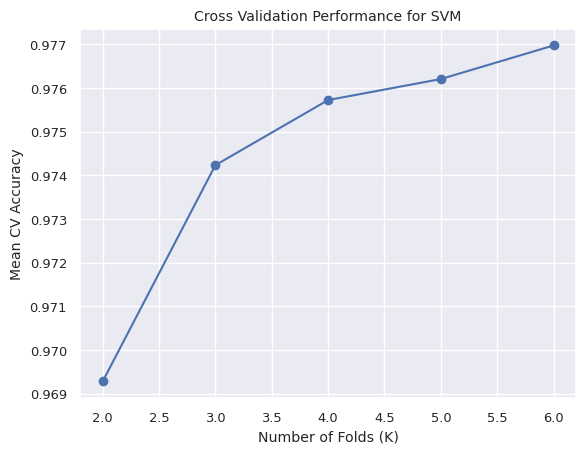

In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels based on your data

# Train the SVM on the training data
svm_classifier.fit(X_train, Y_train)

X_test_prediction = svm_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the training data : ', round(testing_data_accuracy,4))


scores = cross_val_score(svm_classifier, X, Y, cv=5, scoring='accuracy')


#Print the cross-validation scores
print("Cross-Validation Scores:", scores)

#Uncomment this to run- takes 7-8 mins
'''k_values = range(2,7)
cv_scores = []

for k in k_values:
    scores = cross_val_score(svm_classifier, X, Y, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))'''

# Plot the cross-validation results
plt.figure()
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross Validation Performance for SVM')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

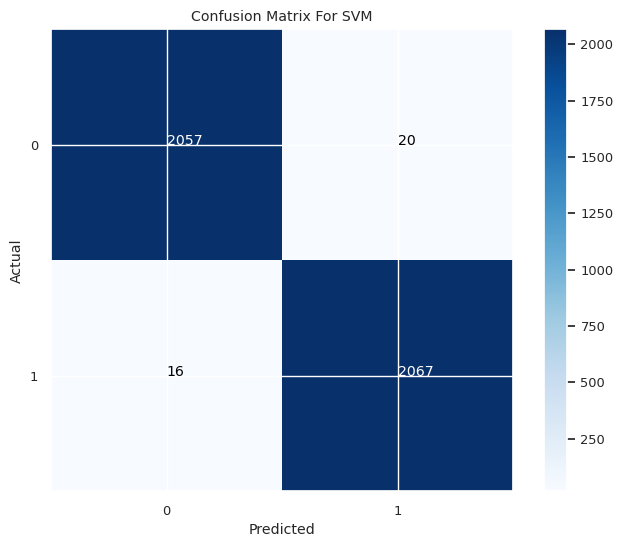

In [ ]:

cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix For SVM')
plt.colorbar()
tick_marks = range(len(set(Y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, cm[i, j], color='White' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()


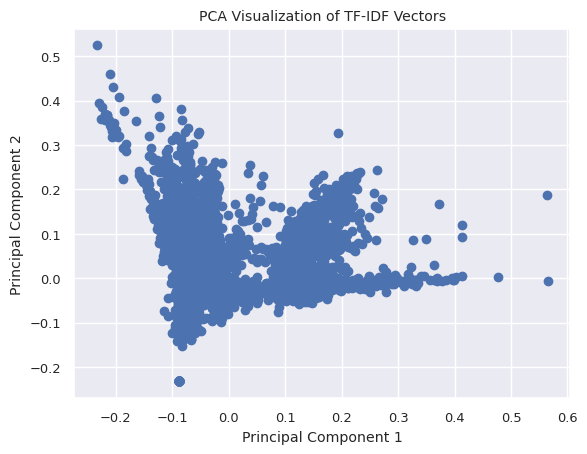

In [ ]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X contains your TF-IDF vectors
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

# Plot the reduced data
plt.scatter(reduced_X[:, 0], reduced_X[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of TF-IDF Vectors')
plt.show()

--------------------------------------------------------------------------------


Third Model : Naive Bayes

Metrics :

1. Accuracy
2. Cross Validation
3. Cross Validation Performance with K folds
4. ROC curve
5. Confusion Metrics

Details:  Variants of Naive Bayes
1) Bernouli - Binary
2)Multinomial: discrete features (word count)
3) Gaussian : real valued features

We are using Multinomial NB.


Accuracy score of the training data :  0.9396634615384616
Cross-Validation Scores: [0.93774038 0.93846154 0.93942308 0.94110577 0.93894231]


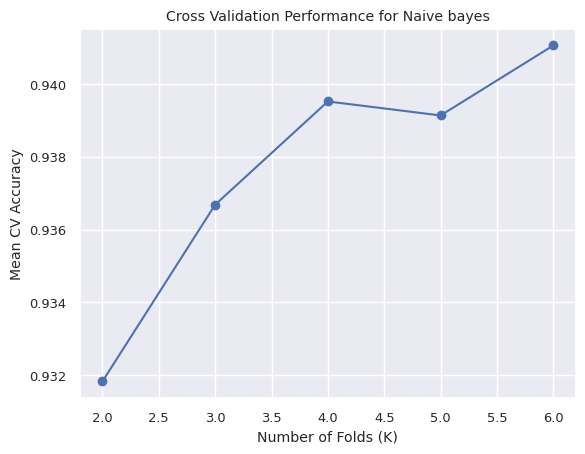

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB(alpha=0.01)

# Train the Naive Bayes on the training data
naive_model.fit(X_train, Y_train)

X_test_prediction = naive_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

scores = cross_val_score(naive_model, X, Y, cv=5, scoring='accuracy')

print('Accuracy score of the training data : ',test_data_accuracy)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

k_values = range(2,7)
cv_scores = []

for k in k_values:
    scores = cross_val_score(naive_model, X, Y, cv=k, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the cross-validation results
plt.figure()
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Cross Validation Performance for Naive bayes')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()





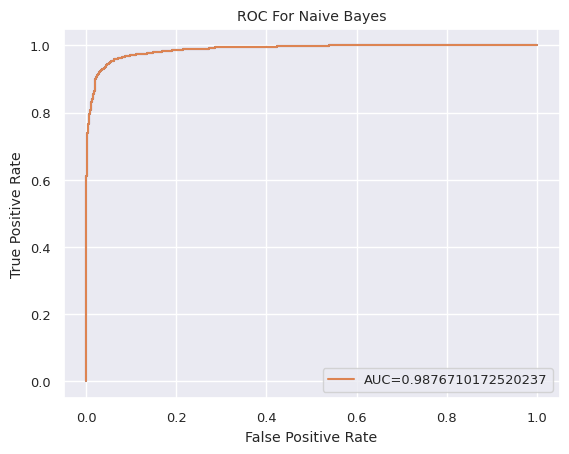

In [ ]:
#define metrics
y_pred_proba = naive_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.title('ROC For Naive Bayes')
plt.plot(fpr,tpr)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

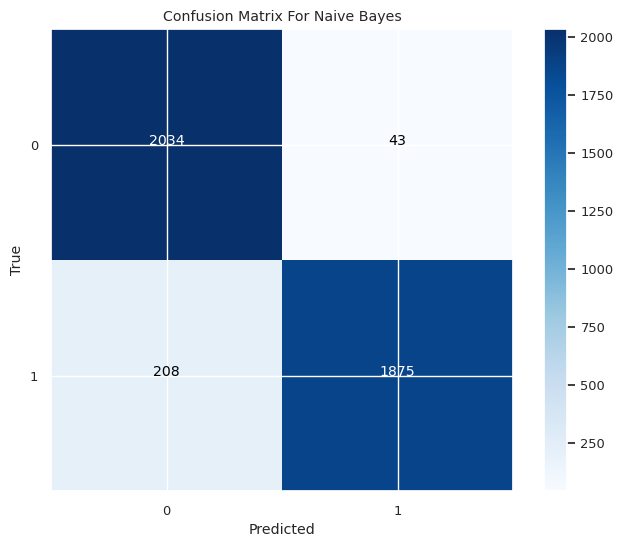

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Naive Bayes')
plt.colorbar()
tick_marks = range(len(set(Y_test)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(tick_marks)):
    for j in range(len(tick_marks)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='White' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()
#cm

In [ ]:
#Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)

# Calculate F1 score using the formula
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9775808133472367
Recall: 0.900144023043687
F1 Score: 0.9372656835791051


***Verification*** from Test Data Set

In [ ]:
X_new = X_test[3]

prediction_logistic = logistic_model.predict(X_new)
prediction_svm = svm_classifier.predict(X_new)
prediction_nb = naive_model.predict(X_new)

if (prediction_logistic[0]==0):
  print('Logistic Model predicts the news being Real')
else:
  print('Logistic Model predicts the news is Fake')


if (prediction_svm[0]==0):
  print('SVM predicts the news being Real')
else:
  print('SVM predicts the news is Fake')


if (prediction_nb[0]==0):
  print('Naive Bayes predicts the news being Real')
else:
  print('Naive Bayes predicts the news is Fake')

Logistic Model predicts the news being Real
SVM predicts the news being Real
Naive Bayes predicts the news being Real


Out of the three models SVM is giving more accurate results than the other two , hence for fake news detection we will go ahead with Support Vector Model.

##Neural Networks

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from tensorflow.keras.layers import Dense, Embedding, Activation, Flatten,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import io
from tensorflow.keras.layers import LSTM,Bidirectional
import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.models import load_model
import pickle
from sklearn.utils import shuffle
from keras.optimizers import SGD

Same pre-processing as done earlier - removing stop words and applying stemming

#### Initialize a tokenizer with specific filters and an out-of-vocabulary token.
#### Fit the tokenizer on the 'content' column of the 'news_dataset'.


In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',oov_token="<OOV>")
tokenizer.fit_on_texts(news_dataset_NN['content'])

#### Create a dictionary of words and their corresponding numeric indices from the trained tokenizer.
#### This mapping of words to indices is crucial for converting text data into sequences of numbers, which is often required for feeding text data into machine learning models, such as neural networks.

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'new': 2, 'time': 3, 'york': 4, 'trump': 5, 'breitbart': 6, 'clinton': 7, 'hillari': 8, 'donald': 9, 'news': 10, 'elect': 11, 'u': 12, 'say': 13, 'obama': 14, 'michael': 15, 'john': 16, 'russia': 17, 'com': 18, 'us': 19, 'video': 20, 'presid': 21, 'war': 22, 'state': 23, 'world': 24, 'vote': 25, 'america': 26, 'report': 27, 'american': 28, 'day': 29, 'year': 30, 'attack': 31, 'fbi': 32, 'email': 33, 'comment': 34, 'call': 35, 'admin': 36, 'hous': 37, 'get': 38, 'media': 39, 'kill': 40, 'white': 41, 'blogger': 42, 'norepli': 43, 'david': 44, 'polic': 45, 'bill': 46, 'daniel': 47, 'campaign': 48, 'key': 49, 'plan': 50, 'support': 51, 'protest': 52, 'democrat': 53, 'charli': 54, 'one': 55, 'de': 56, 'make': 57, 'russian': 58, 'first': 59, 'e': 60, 'black': 61, 'syria': 62, 'show': 63, 'win': 64, 'pam': 65, 'robert': 66, 'jame': 67, 'right': 68, 'man': 69, 'mike': 70, 'break': 71, 'brief': 72, 'anti': 73, 'take': 74, 'peopl': 75, 'back': 76, 'nation': 77, 'even': 78, 'b': 79, 

#### Tokenize the text data in 'news_dataset' and convert it to sequences of numbers using the trained tokenizer.
#### Then, pad the sequences to have the same length for further processing.


In [ ]:
X_train = tokenizer.texts_to_sequences(news_dataset_NN['content'])
X_train = pad_sequences(X_train,padding='post')

In [ ]:
print(news_dataset['content'][1])
print(X_train[1])

daniel j flynn flynn hillari clinton big woman campu breitbart
[  47   84  789  789    8    7  153  192 1531    6    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


#### Calculate the vocabulary size, encode labels using LabelEncoder, and one-hot encode the labels.


In [ ]:
vocab_size = len(word_index)+1
label_encoder  = LabelEncoder()
Y = news_dataset['label'].values
Y_train = label_encoder.fit_transform(Y)
Y_train = to_categorical(Y_train,num_classes=2)
print(Y_train)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# Function Definition:
def keras_model(X_train):
    # Calculate the maximum sequence length in X_train
    max_len = len(X_train[0])

    # Set the dimensionality of word embeddings
    embedding_dim = 8

    # Calculate the vocabulary size (plus one for out-of-vocabulary token)
    vocab_size = len(word_index) + 1

    # Create a Sequential Keras model
    model = Sequential()

    # Add an embedding layer to convert word indices to embeddings
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))

    # Add a Global Average Pooling 1D layer for dimension reduction
    model.add(GlobalAveragePooling1D())

    # Add a dense layer with 16 units and ReLU activation
    model.add(Dense(16, activation='relu'))

    # Add a final dense layer with 2 unit (for binary classification) and softmax activation
    model.add(Dense(2,activation='softmax'))
    # Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Display a summary of the model architecture
    model.summary()

    # Return the compiled Keras model
    return model


Define Number of Epochs (loops) = 5 and fit the model on training dataset.

In [ ]:
num_epochs = 5
model = keras_model(X_train)
history=model.fit(X_train,Y_train,epochs=num_epochs,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 51, 8)             137184    
                                                                 
 global_average_pooling1d (  (None, 8)                 0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 137362 (536.57 KB)
Trainable params: 137362 (536.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
650/650 [==============================] - 4s 5ms/step - loss: 0.4346 - 

In [ ]:
#Get the embedding layer from the model
e = model.layers[0]
#Get the weights from the embedding layer of the model
weights = e.get_weights()[0]
print(weights.shape)

(17148, 8)


In [ ]:
#Reverse the word_index dictionary for easy use
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

#This will download vectors and meta data file which we have to upload on https://projector.tensorflow.org/ to see the visual.

out_v = io.open('vecs_dp.tsv','w',encoding='utf-8')
out_m = io.open('meta_dp.tsv','w',encoding='utf-8')

for word_num in range(1,weights.shape[0]):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

####Make Prediction on unseen data by converting it from text to sequence.

In [ ]:
sentence = np.array(["Truth Broadcast Network Keiser Report: Meme Wars (E995)"])
sentence = tokenizer.texts_to_sequences(sentence)
sentence = pad_sequences(sentence,padding='post',maxlen=len(X_train[0]))

class_dict = {0:"Legit",1:"Fake"}

In [ ]:
prediction = model.predict(sentence)
print(prediction)
predicted_classes = np.argmax(prediction, axis=1)
print(class_dict[predicted_classes[0]])

1/1 [==============================] - 0s 91ms/step
[[0.00152079 0.9984792 ]]
Fake


In [ ]:
#Some Examples to test from testing set

#actual label = 0 Legit
sentence1 = "David Streitfeld Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times"

#actual label = 1 Fake
sentence2 = "Truth Broadcast Network Keiser Report: Meme Wars (E995)"